In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/kunj/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
customer = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [4]:
print("\n ---Missing Values---")
print("Customers Missing Values:\n", customer.isnull().sum())
print("Products Missing Values:\n", products.isnull().sum())
print("Transactions Missing Values:\n", transactions.isnull().sum())


 ---Missing Values---
Customers Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
print("\n--- Data Types ---")
print("Customers Data Types:\n", customer.dtypes)
print("Products Data Types:\n", products.dtypes)
print("Transactions Data Types:\n", transactions.dtypes)


--- Data Types ---
Customers Data Types:
 CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
Products Data Types:
 ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
Transactions Data Types:
 TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


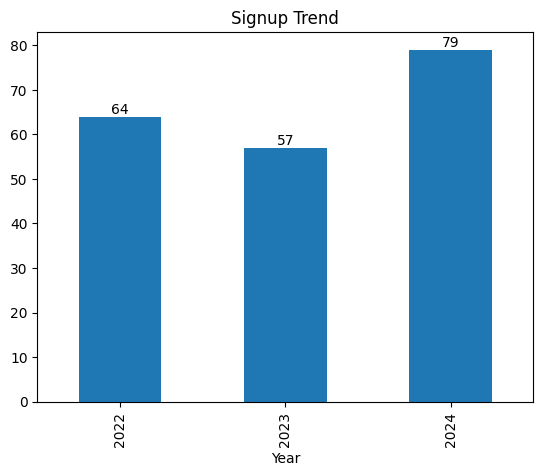

In [6]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
customer['Year'] = customer['SignupDate'].dt.year
signup_trend = customer.groupby('Year').size()
signup_trend.plot(kind='bar', title='Signup Trend')
for year, count in enumerate(signup_trend):
    plt.text(year, count, str(count), ha='center', va='bottom')


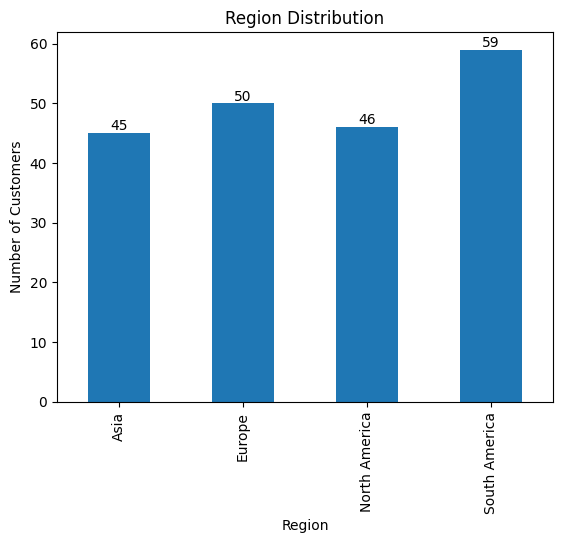

In [8]:
region_distribution = customer.groupby('Region').size()
for region, count in enumerate(region_distribution):
    plt.text(region, count, str(count), ha='center', va='bottom')
region_distribution.plot(kind='bar', title='Region Distribution')
plt.ylabel('Number of Customers')
plt.show()


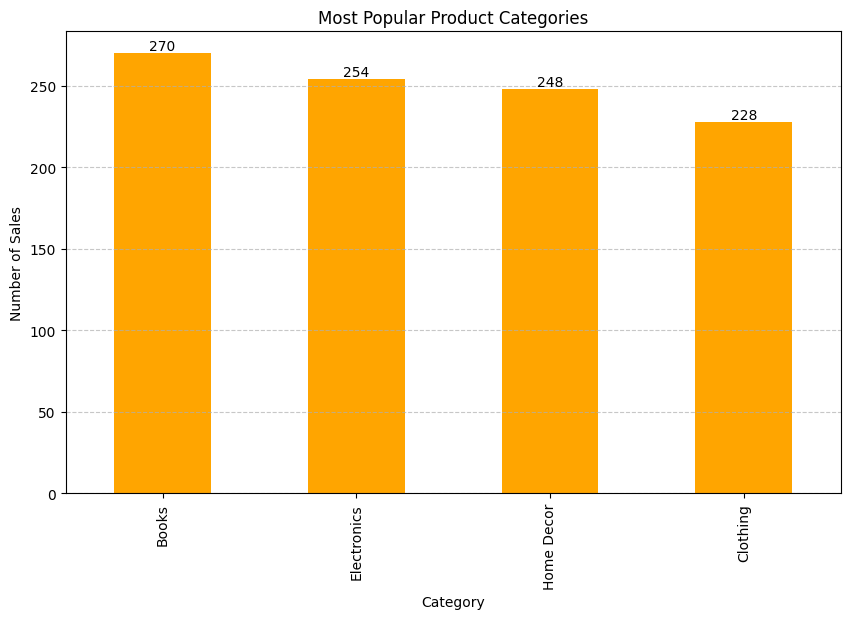

In [9]:

popular_products = products.merge(transactions, on='ProductID')
category_sales = popular_products['Category'].value_counts()
for category, count in enumerate(category_sales):
    plt.text(category, count, str(count), ha='center', va='bottom')
category_sales.plot(kind='bar', title='Most Popular Product Categories', color='orange', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


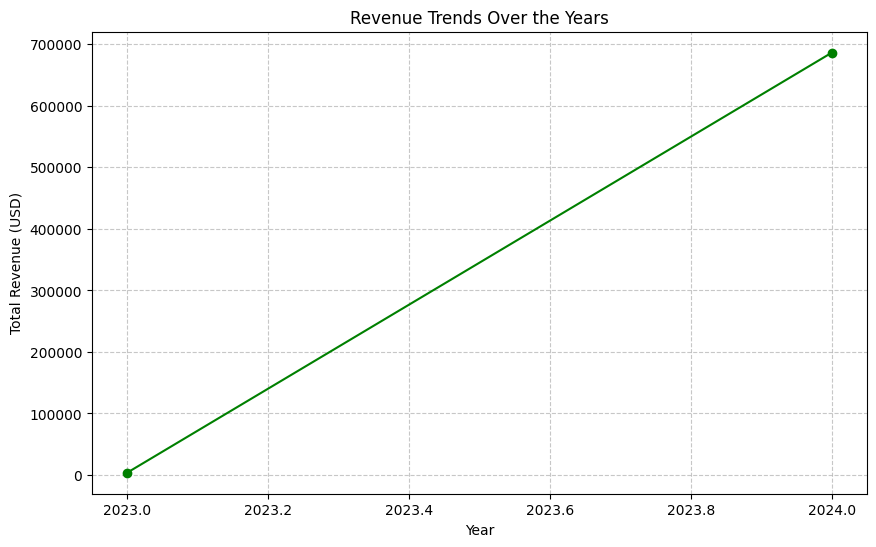

In [18]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
revenue_per_year = transactions.groupby('Year')['TotalValue'].sum()
revenue_per_year.plot(kind='line', marker='o', title='Revenue Trends Over the Years', color='green', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Revenue (USD)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

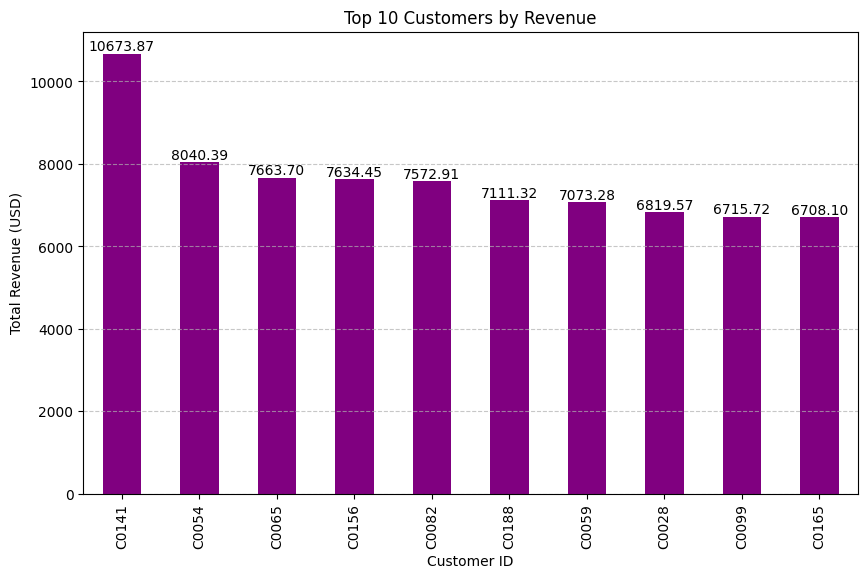

In [11]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
for customer, revenue in enumerate(top_customers):
    plt.text(customer, revenue, f"{revenue:.2f}", ha='center', va='bottom')
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', color='purple', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()